In [1]:
# importation of variables
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from scipy.sparse import csr_matrix

In [2]:
data = pd.read_csv('tv2.csv')
data = pd.DataFrame(data)

In [3]:
data.shape

(915, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 915 non-null    object 
 1   Model                 574 non-null    object 
 2   Type                  915 non-null    object 
 3   Screen Size           746 non-null    object 
 4   Display Technology    702 non-null    object 
 5   Condition             915 non-null    object 
 6   name                  915 non-null    object 
 7   price                 915 non-null    object 
 8   Display Resolution    487 non-null    object 
 9   Display Type          231 non-null    object 
 10  Refresh Rate          226 non-null    object 
 11  TV Operation System   147 non-null    object 
 12  Exchange Possible     136 non-null    object 
 13  Projector Resolution  8 non-null      object 
 14  Image Brightness      8 non-null      float64
 15  Projector Features    6

In [5]:
data.head()

,Brand,Model,Type,Screen Size,Display Technology,Condition,name,price,Display Resolution,Display Type,Refresh Rate,TV Operation System,Exchange Possible,Projector Resolution,Image Brightness,Projector Features,Operating System,Maximum Resolution,Storage Capacity,Connectivity
0,Samsung,"55"" Crystal UHD AU7002",TVs,55 inches,LED,Brand New,"Unveil Authentic 55"" Crystal UHD AU7002 Smart TV","GH₵ 6,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hitachi,Hitachi,TVs,32 inches,LED,Used,"Hitachi 32"" Inch Digital Smart Full HD TV","GH₵ 1,500",1080p (FullHD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Smeco,32,TVs,32 inches,LED,Brand New,Smeco 32inch TV Digital Satellite,"GH₵ 1,049",1080p (FullHD),Glossy,60 Hz,Without Smart TV,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LG,LG,TVs,55 inches,LED,Used,"4K LG 55"" Inch Smart Satellite Ultra HD Led TV","GH₵ 5,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nasco,NaN,TVs,NaN,NaN,Brand New,Watch Amazing 50 Smart Nasco With Youtube Netflix,"GH₵ 2,099",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# comment line two and three after first run
data['Screen Size']
data.describe()
data['price'] = data['price'].str.split().str[1].str.replace(',', '').astype(int)
data['Screen Size'] = pd.to_numeric(data['Screen Size'].str.split().str[0], errors='coerce')
data.describe()

,Screen Size,price,Image Brightness
count,746.000000,915.00000,8.000000
mean,49.648794,11627.31694,3312.500000
std,15.308373,47007.21869,1032.939633
min,20.000000,120.00000,1500.000000
25%,40.000000,1899.50000,3000.000000
50%,50.000000,3600.00000,3000.000000
75%,55.000000,7200.00000,4000.000000
max,130.000000,650000.00000,5000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 915 non-null    object 
 1   Model                 574 non-null    object 
 2   Type                  915 non-null    object 
 3   Screen Size           746 non-null    float64
 4   Display Technology    702 non-null    object 
 5   Condition             915 non-null    object 
 6   name                  915 non-null    object 
 7   price                 915 non-null    int64  
 8   Display Resolution    487 non-null    object 
 9   Display Type          231 non-null    object 
 10  Refresh Rate          226 non-null    object 
 11  TV Operation System   147 non-null    object 
 12  Exchange Possible     136 non-null    object 
 13  Projector Resolution  8 non-null      object 
 14  Image Brightness      8 non-null      float64
 15  Projector Features    6

In [8]:
data.isnull().sum()
percent_missing = round(data.isnull().sum() * 100 / len(data), 2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Brand,0.00
Model,37.27
Type,0.00
Screen Size,18.47
Display Technology,23.28
Condition,0.00
name,0.00
price,0.00
Display Resolution,46.78
Display Type,74.75


In [9]:
# brand, model, type, screen size, display technology, condition
print(data['Display Technology'].value_counts())
data['Display Technology'] = data['Display Technology'].fillna('LED')
data['Display Technology'].value_counts()

Display Technology
LED       637
QLED       35
OLED       21
CRT         7
Plasma      2
Name: count, dtype: int64


Display Technology
LED       850
QLED       35
OLED       21
CRT         7
Plasma      2
Name: count, dtype: int64

In [10]:
data.drop(data[data['Brand'] == 'VIZIO'].index, inplace = True)
# Group by 'Brand' and calculate the mean screen size for each brand
mean_screen_size_by_brand = data.groupby('Brand')['Screen Size'].mean()#.round().astype(int)
# print(mean_screen_size_by_brand)
mean_screen_size_df = mean_screen_size_by_brand.reset_index()
print(mean_screen_size_df)
mean_screen_size_df = mean_screen_size_df[mean_screen_size_df['Screen Size'].notna()]
mean_screen_size_df['Average Screen Size'] = mean_screen_size_df['Screen Size'].round().astype(int)
print(mean_screen_size_df)

# Print or use the resulting Series
# print(mean_screen_size_df)

data['Screen Size'] = data.apply(lambda row: mean_screen_size_by_brand[row['Brand']] if pd.isna(row['Screen Size']) else row['Screen Size'], axis=1)
brands_remove = ['Benq', 'Epson', 'Panasonic', 'Universal', 'sound bar']
data.drop(data[data['Brand'].isin(brands_remove)].index, inplace = True)


          Brand  Screen Size
0       AILYONS    32.000000
1         ASANO    36.500000
2          Akai    65.000000
3         Asano    40.486486
4         Asona    32.000000
5        BANANA    58.000000
6     Banana tv    50.000000
7          Benq          NaN
8         Bruhm    42.000000
9         Epson          NaN
10  Global Star    32.000000
11        Haier    85.000000
12      Hitachi    32.000000
13       Innova    43.000000
14         Itel    39.333333
15           LG    58.365517
16        Nasco    43.921569
17        Other    40.670588
18        PEARL    32.000000
19    Panasonic          NaN
20        Pearl    33.100000
21      Protech    55.000000
22         Roch    50.000000
23      Samsung    58.321429
24        Sharp    39.666667
25     Skyworth    47.833333
26        Smart    38.500000
27        Smeco    32.000000
28         Sony    60.454545
29     Sun King    40.000000
30       Syinix    45.888889
31          TCL    48.072581
32      Toshiba    37.500000
33    Universa

In [11]:
data['Condition'].value_counts()

Condition
Brand New    892
Used          14
Name: count, dtype: int64

In [12]:
non_tv = ['Projector', 'Other', 'Blu-Ray Players', 'TV Boxes', 'TV wall mount']
data['Type'].value_counts()
data.drop(data[data['Type'].isin(non_tv)].index, inplace = True)
data['Type'].value_counts()

Type
TVs    895
Name: count, dtype: int64

In [13]:
data.isnull().sum()
percent_missing = round(data.isnull().sum() * 100 / len(data), 2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Brand,0.00
Model,37.99
Type,0.00
Screen Size,0.00
Display Technology,0.00
Condition,0.00
name,0.00
price,0.00
Display Resolution,45.59
Display Type,74.19


In [36]:
data['Brand'] = data['Brand'].str.upper()
data['Brand'].replace({'ASONA': 'ASANO'}, inplace=True)
data['Brand'].replace({'BANANA': 'BANANA TV'}, inplace=True)
data['Brand']#.value_counts()
import warnings
warnings.filterwarnings('ignore')

In [18]:
data['Display Technology'].value_counts()

Display Technology
LED       830
QLED       35
OLED       21
CRT         7
Plasma      2
Name: count, dtype: int64

In [19]:
data['Condition'].value_counts()

Condition
Brand New    884
Used          11
Name: count, dtype: int64

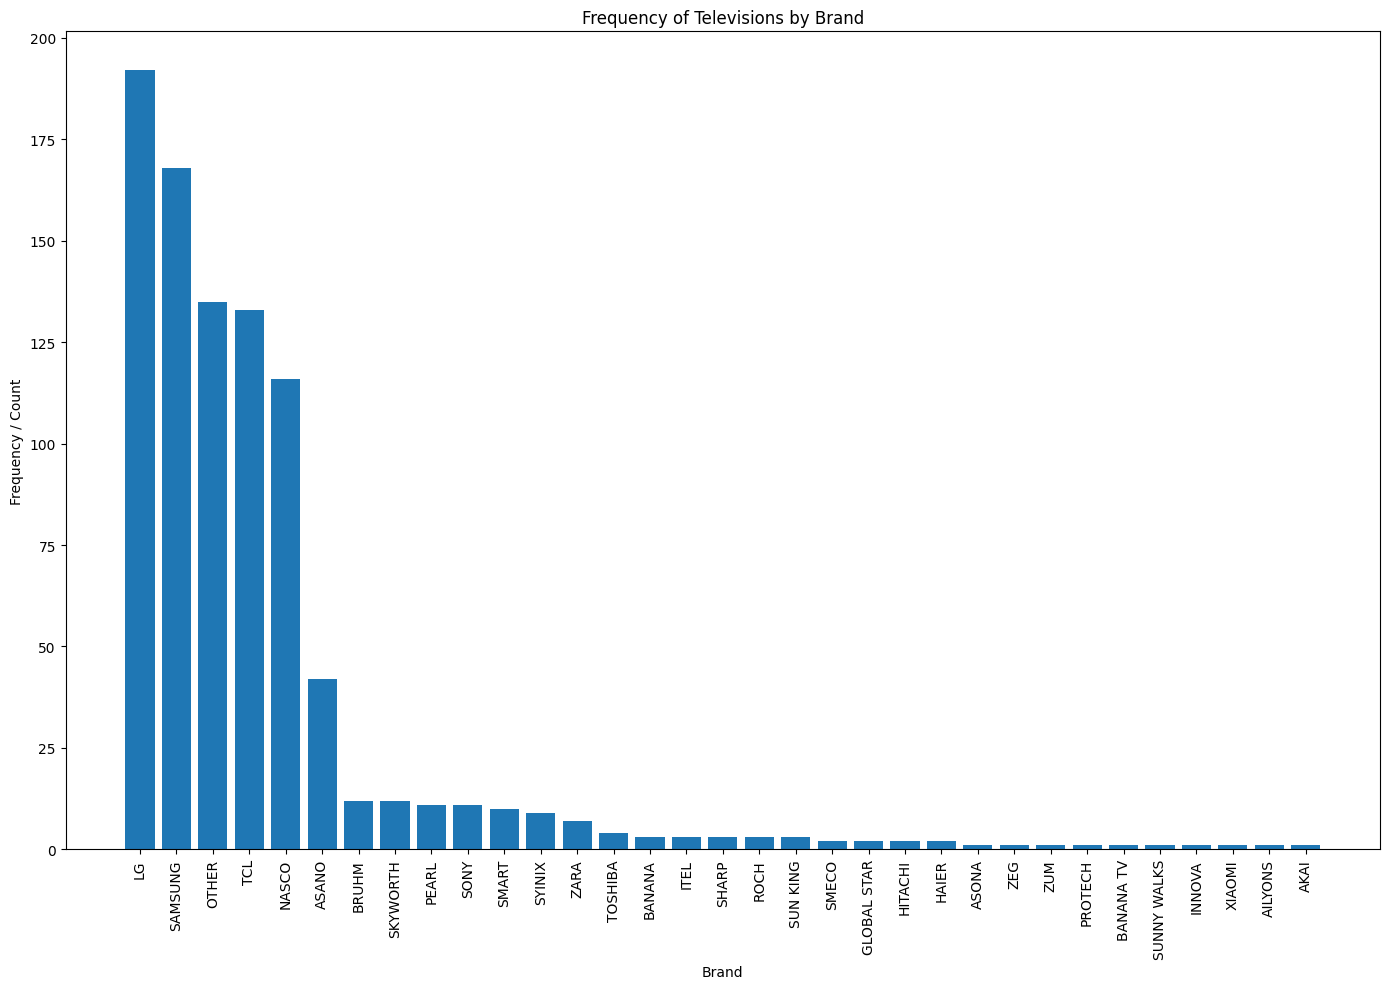

In [20]:
brand_counts = data['Brand'].value_counts()

# Plot the bar chart
plt.figure(figsize=(14, 10))
bar_width = 0.8
bar_spacing = 0.2
plt.bar(brand_counts.index, brand_counts.values, align='center')

# Optionally, customize the plot
plt.xlabel('Brand')
plt.ylabel('Frequency / Count')
plt.title('Frequency of Televisions by Brand')
plt.xticks(rotation=90)  # Rotate x-labels if needed for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('tvbrand.png')
plt.show()

In [19]:
# data.count()

Text(0, 0.5, 'Price (GHc)')

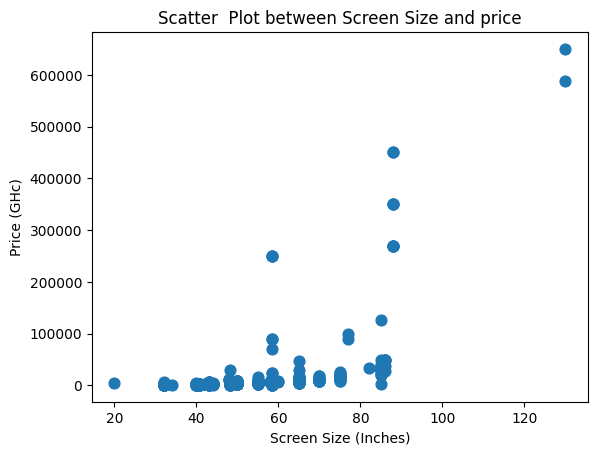

In [21]:
plt.scatter(data['Screen Size'], data['price'], s=60)
plt.title('Scatter  Plot between Screen Size and price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (GHc)')
# plt.savefig('scatter.png')

In [22]:
data.shape

(895, 20)

In [23]:
data.describe()

,Screen Size,price,Image Brightness
count,895.000000,895.000000,0.0
mean,49.765277,11774.164246,NaN
std,14.376655,47509.859643,NaN
min,20.000000,949.000000,NaN
25%,40.670588,1900.000000,NaN
50%,50.000000,3600.000000,NaN
75%,58.321429,7100.000000,NaN
max,130.000000,650000.000000,NaN


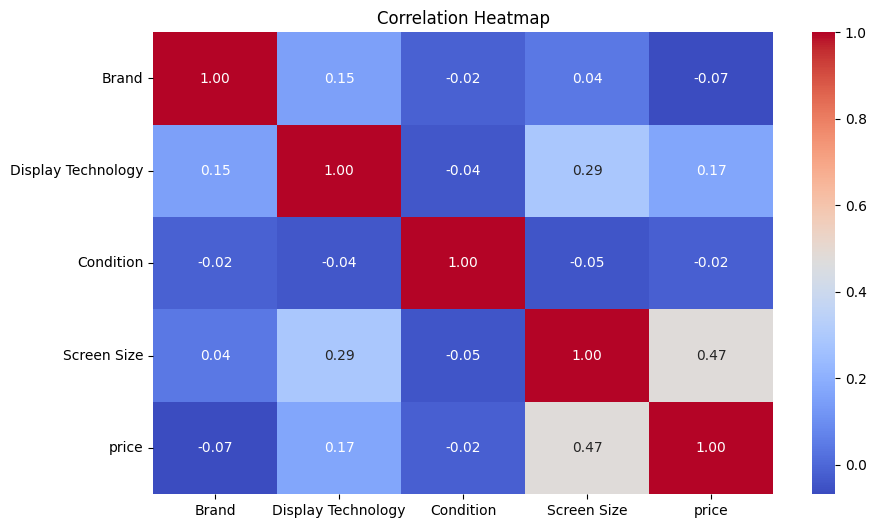

In [24]:
# data1=data.corr()
categorical_columns = ['Brand', 'Display Technology', 'Condition']  
data_encoded = data[['Brand', 'Display Technology', 'Condition', 'Screen Size', 'price']].copy()
# data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns)
# sns.heatmap(data_encoded.corr(), annot=True)
# sns.heatmap(data, annot=True)

# plt.figure(figsize=(12, 10))

# num_df = data
# # le = LabelEncoder()
# # for column in categorical_columns:
# #     Num_data_set[column] = le.fit_transform(Num_data_set[column])
# # Num_data_set

# # categorical_columns = ['Month','VisitorType']

le = LabelEncoder()
for column in categorical_columns:
    data_encoded[column] = le.fit_transform(data_encoded[column])
data_encoded


correlation_matrix = data_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

In [37]:
# brands
sorted_brands = data['Brand'].value_counts().sort_index()
sorted_brands

Brand
AILYONS          1
AKAI             1
ASANO           43
BANANA TV        4
BRUHM           12
GLOBAL STAR      2
HAIER            2
HITACHI          2
INNOVA           1
ITEL             3
LG             192
NASCO          116
OTHER          135
PEARL           11
PROTECH          1
ROCH             3
SAMSUNG        168
SHARP            3
SKYWORTH        12
SMART           10
SMECO            2
SONY            11
SUN KING         3
SUNNY WALKS      1
SYINIX           9
TCL            133
TOSHIBA          4
XIAOMI           1
ZARA             7
ZEG              1
ZUM              1
Name: count, dtype: int64

In [38]:
# brands
sorted_disp = data['Display Technology'].value_counts().sort_index()
sorted_disp

Display Technology
CRT         7
LED       830
OLED       21
Plasma      2
QLED       35
Name: count, dtype: int64

In [48]:
# brands
sorted_con = data['Condition'].value_counts().sort_index()
sorted_con

Condition
Brand New    884
Used          11
Name: count, dtype: int64

In [29]:
# Select relevant features and target variable
features = ['Brand', 'Screen Size', 'Display Technology', 'Condition']
target = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=105)


# Create a column transformer for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Brand', 'Display Technology', 'Condition'])
    ],
    remainder='passthrough'
)

# Create a linear regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)


# Print the R-squared score
print(f'R-squared score: {score}')
# model.coef_()}

R-squared score: 0.9019597240576921


In [32]:
# Let's assume 'Screen Size' is a numerical feature
screen_size = 55  # Example numerical feature
x_point = {'Brand': 'Samsung', 'Screen Size': 55, 'Display Technology': 'LED', 'Condition': 'New'}

# Convert the input data point into a DataFrame
x_df = pd.DataFrame([x_point])

# Add the 'Screen Size' feature to the DataFrame
# x_df['Screen Size'] = screen_size

# Preprocess the input data point using the preprocessor
# transformed_x = preprocessor.transform(x_df)

# Make the prediction
# y_pred = model.predict(transformed_x)
# transformed_x
x_df

,Brand,Screen Size,Display Technology,Condition
0,Samsung,55,LED,New


In [34]:
# x_point = np.array(['Brand', 'Display Technology', 'Condition'])
y_pred = model.predict(x_df)
y_pred[0]

87453.53166018706

In [ ]:
# save model
filename = 'model.pk1'
joblib.dump(model, filename)

In [ ]:
# save model with pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
# Provided data
display_technologies = {'CRT': 7, 'LED': 830, 'OLED': 21, 'Plasma': 2, 'QLED': 35}

# Generate HTML code for <option> tags
option_tags = ''.join([f'<option value="{tech.lower()}">{tech}</option>' for tech in display_technologies.keys()])

# HTML code
html_code = f'''
    {option_tags}
'''

print(html_code)


    <option value="crt">CRT</option><option value="led">LED</option><option value="oled">OLED</option><option value="plasma">Plasma</option><option value="qled">QLED</option>

